# EDA for Linking Writing Process to Writing Quality

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import wordcloud
import PIL
from PIL import Image
import random

# Importing Dataset
I have took the csv from my other [notebook](https://www.kaggle.com/code/jasonheesanglee/code-comments-added-revealing-hidden-words).<br>
There will be updates, so I will constantly update this current notebook as well.

In [3]:
train_scores = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv')
train_logs = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv')
train_recovered = pd.read_csv('/kaggle/input/code-comments-added-revealing-hidden-words/train.csv')

# Basic Info

In [4]:
display(train_scores.info(show_counts=True))
print()
display(train_logs.info(show_counts=True))
print()
display(train_recovered.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      2471 non-null   object 
 1   score   2471 non-null   float64
dtypes: float64(1), object(1)
memory usage: 38.7+ KB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405898 entries, 0 to 8405897
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   id               8405898 non-null  object
 1   event_id         8405898 non-null  int64 
 2   down_time        8405898 non-null  int64 
 3   up_time          8405898 non-null  int64 
 4   action_time      8405898 non-null  int64 
 5   activity         8405898 non-null  object
 6   down_event       8405898 non-null  object
 7   up_event         8405898 non-null  object
 8   text_change      8405898 non-null  object
 9   cursor_position  8405898 non-null  int64 
 10  word_count       8405898 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 705.5+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2471 non-null   object 
 1   revealed_text  2471 non-null   object 
 2   score          2471 non-null   float64
dtypes: float64(1), object(2)
memory usage: 58.0+ KB


None

In [5]:
train_recovered.head(2)

,id,revealed_text,score
0,001519c8,Qqqqqq qqq qqqqq qqqqqq qq qq qqqqq qq qqqq qq...,3.5
1,0022f953,"Qqqq qq qqqqqqqqqqq ? Qq qq qqq qqq qqq, qqqqq...",3.5


In [6]:
train_logs.head(30)

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1
5,001519c8,6,107296,107400,104,Input,q,q,q,3,1
6,001519c8,7,107469,107596,127,Input,q,q,q,4,1
7,001519c8,8,107659,107766,107,Input,q,q,q,5,1
8,001519c8,9,107743,107852,109,Input,q,q,q,6,1
9,001519c8,10,107840,107978,138,Input,Space,Space,,7,1


# Checking down_time & up_time

In [7]:
counter=0
for i in train_logs['id'].unique().tolist():
    print(f"id {i} first down_time \t{train_logs[train_logs['id']==i]['down_time'].iloc[0]}")
    print(f"id {i} last up_time \t{train_logs[train_logs['id']==i]['up_time'].iloc[-1]}")
    print()
    counter += 1
    if counter == 5:
        break

id 001519c8 first down_time 	4526
id 001519c8 last up_time 	1801969

id 0022f953 first down_time 	30623
id 0022f953 last up_time 	1788969

id 0042269b first down_time 	4441
id 0042269b last up_time 	1771669

id 0059420b first down_time 	41395
id 0059420b last up_time 	1404469

id 0075873a first down_time 	78470
id 0075873a last up_time 	1662472



# Creating more features
1. Adding total duration.<br>
I can simply do `.min()` or `.max()` to get the minimum `down_time` and maximum `up_time`, respectively.<br>But I wanted to see if the first `down_time` is the real first `down_time` and if the last `up_time` is the real last `up_time`.
2. Counting each special keys.<br>
Originally, I was aiming to add a column of number of `Backspace` used per each `id`.<br>
But why not?<br>
I am adding all special keys (That I found on keyboard)

In [8]:

# total_duration = []
# num_backspace = []
# num_delete = []
# num_shift = []
# num_space = []
# num_arrowleft = []
# num_arrowright = []
# num_arrowup = []
# num_arrowdown =[]
# num_tab = []
# num_leftclick = []
# num_rightclick = []
# num_capslock = []
# num_insert = []
# num_enter = []
# num_esc = []
# num_control = []
# num_alt = []
# num_dead = []

# num_set = {'num_Backspace' : num_backspace, 'num_Delete' : num_delete, 'num_Shift' : num_shift,
#     'num_Space' : num_space, 'num_ArrowLeft' : num_arrowleft, 'num_ArrowRight' : num_arrowright,
#     'num_ArrowUp' : num_arrowup, 'num_ArrowDown' : num_arrowdown, 'num_Tab' : num_tab,
#     'num_Leftclick' : num_leftclick, 'num_Rightclick' : num_rightclick, 'num_CapsLock' : num_capslock,
#     'num_Insert' : num_insert, 'num_Enter' : num_enter, 'num_Escape' : num_esc,
#     'num_Control' : num_control, 'num_Alt' : num_alt, 'num_Dead' : num_dead
#           }

# id_list = train_logs['id'].unique().tolist()

# for i in tqdm(id_list):
#     temp = train_logs[train_logs['id']==i]
    
#     # Checking down_time & up_time
#     if (temp['down_time'].iloc[0]>temp['down_time'].iloc[1]) == True:
#         down_time = temp['down_time'].min()
#     else:
#         down_time = temp['down_time'].iloc[0]
#     if (temp['up_time'].iloc[-2]>temp['up_time'].iloc[-1]) == True:
#         up_time = temp['up_time'].max()
#     else:
#         up_time = temp['up_time'].iloc[-1]
#     total_duration.append(up_time - down_time)
    
#     for key, value in num_set.items():
#         key = key.split('_')[1]
        
#         # Checking the frequency of replace & delete
#         try:
#             value.append(temp['down_event'].value_counts()[key])
#         except KeyError:
#             value.append(0)

# train_recovered['total_duration'] = pd.Series(total_duration)

# for key, value in tqdm(num_set.items()):
#     train_recovered[key] = pd.Series(value)


In [9]:
# train_recovered.to_csv('train_recovered.csv', index=False)

In [10]:
train_recovered = pd.read_csv('/kaggle/input/wp2wq-train/train_recovered.csv')

In [11]:
train_recovered.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2471 non-null   object 
 1   revealed_text   2471 non-null   object 
 2   score           2471 non-null   float64
 3   total_duration  2471 non-null   int64  
 4   num_Backspace   2471 non-null   int64  
 5   num_Delete      2471 non-null   int64  
 6   num_Shift       2471 non-null   int64  
 7   num_Space       2471 non-null   int64  
 8   num_ArrowLeft   2471 non-null   int64  
 9   num_ArrowRight  2471 non-null   int64  
 10  num_ArrowUp     2471 non-null   int64  
 11  num_ArrowDown   2471 non-null   int64  
 12  num_Tab         2471 non-null   int64  
 13  num_Leftclick   2471 non-null   int64  
 14  num_Rightclick  2471 non-null   int64  
 15  num_CapsLock    2471 non-null   int64  
 16  num_Insert      2471 non-null   int64  
 17  num_Enter       2471 non-null   i

In [12]:
list_for_image_cloud = []
for i in train_recovered.drop(columns=['id', 'revealed_text', 'score', 'total_duration']).columns.tolist():
    list_for_image_cloud.append(i)
list_alphas = ['Enter', 'Shift', 'Space', 'Tab', 'Backspace']

image_sources={}
for i in list_for_image_cloud:
    key = i.split('_')[1]
    key_up = key.upper()
    if key == 'Control':
        image_sources['Control'] = Image.open("/kaggle/input/keyboard-keys/FUNCTION/CTRL.png")
    elif key == 'Duration':
        image_sources['total_duration'] = Image.open("/kaggle/input/keyboard-keys/WP2WQ/TOTALDURATION.png")
    elif key == 'Escape':
        image_sources[key] = Image.open("/kaggle/input/keyboard-keys/FUNCTION/ESC.png")
    elif key == 'Dead':
        image_sources[key] = Image.open(f"/kaggle/input/keyboard-keys/WP2WQ/{key_up}.png")
    elif 'Arrow' in key:
        image_sources[key] = Image.open(f"/kaggle/input/keyboard-keys/ARROW/{key_up}.png")
    elif 'click' in key:
        image_sources[key] = Image.open(f"/kaggle/input/keyboard-keys/MOUSE/{key_up}.png")
    elif key in list_alphas:
        image_sources[key] = Image.open(f"/kaggle/input/keyboard-keys/ALPHAKEY/{key_up}.png")
    else:
        image_sources[key] = Image.open(f"/kaggle/input/keyboard-keys/FUNCTION/{key_up}.png")

In [13]:
key_frequency = train_recovered.drop(columns=['id', 'revealed_text', 'score', 'total_duration']).sum()
key_frequency

num_Backspace      964089
num_Delete          10965
num_Shift          334227
num_Space         1207128
num_ArrowLeft       63217
num_ArrowRight     121338
num_ArrowUp         28189
num_ArrowDown       30874
num_Tab              1081
num_Leftclick       91126
num_Rightclick        655
num_CapsLock        12568
num_Insert            226
num_Enter           22689
num_Escape             41
num_Control          4885
num_Alt               466
num_Dead               53
dtype: int64

# Visualization

100%|██████████| 18/18 [00:00<00:00, 141.70it/s]

Frequency of each keys


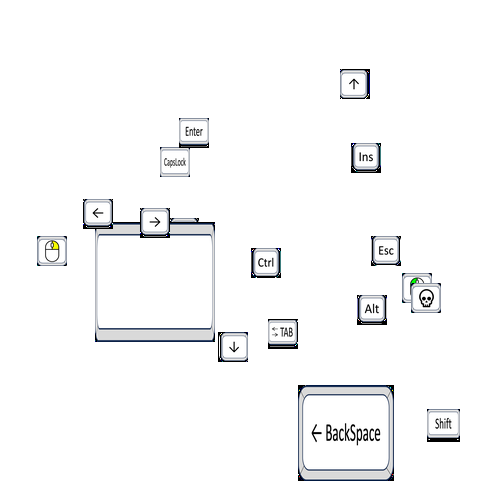

In [15]:
wordcloud = Image.new("RGB", (500, 500), (255, 255, 255))


for key, image in tqdm(image_sources.items()):
    if key != 'Total_Duration':
        key = f'num_{key}'
    else:
        key = 'total_duration'

#     new_width = max(int((image.width/10)*key_frequency[key]), 1)
#     new_height = max(int((image.height/10)*key_frequency[key]), 1)
    new_width = max(int(key_frequency[key] / 10000), 1)
    new_height = max(int(key_frequency[key] / 10000), 1)
    min_width = 30
    min_height = 30
    if new_width < min_width:
        new_width = min_width
    if new_height < min_height:
        new_height = min_height
    
    resized_image = image.resize((new_width, new_height), Image.LANCZOS)
    
    wordcloud.paste(resized_image, (random.randint(0, 500-new_width), random.randint(0, 500-new_height)))
# print('Still not displayed as I intended to')
print('Frequency of each keys')
wordcloud

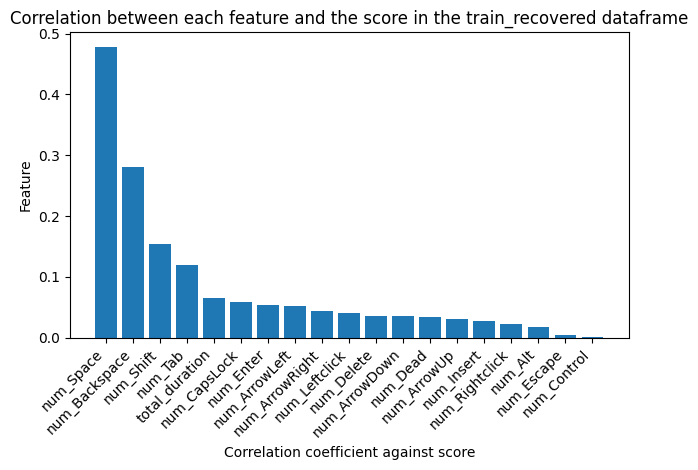

In [16]:
for_vis = train_recovered.drop(columns=['id','revealed_text'])
corr_matrix = for_vis.corr()
corr_coeffs = corr_matrix['score']

corr_coeffs = corr_coeffs.abs().sort_values(ascending=False)
plt.bar(corr_coeffs.index.drop('score'), corr_coeffs.values[1:])
plt.xlabel('Correlation coefficient against score')
plt.ylabel('Feature')
plt.title('Correlation between each feature and the score in the train_recovered dataframe')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()